Primero he dejado la implementación inical del problema, comentandolo para ir entendiendolo mejor, y en la siguiente casilla de código he cambiado principalmente el cálculo de cómo se elige aleatoriamente la siguiente casilla a evaluar, haciendo una lista de cada posición (i,j) y mezclando esta lista, para que cada posición salga solo una vez y de forma aleatoria, simplemente consultando el valor de la lista.

Esto ha llevado a una mejoría de tiempo de unas 15 veces más rápido.




Día: 1
 Número de células: 1


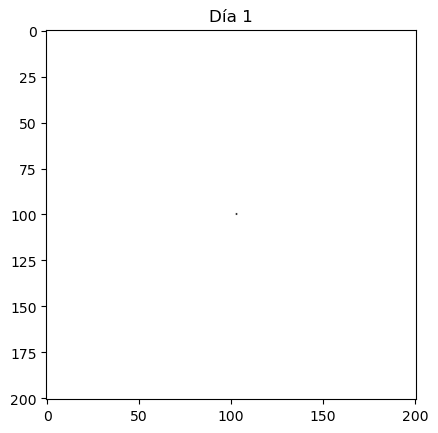


Día: 2
 Número de células: 1

Día: 3
 Número de células: 1

Día: 4
 Número de células: 3

Día: 5
 Número de células: 3


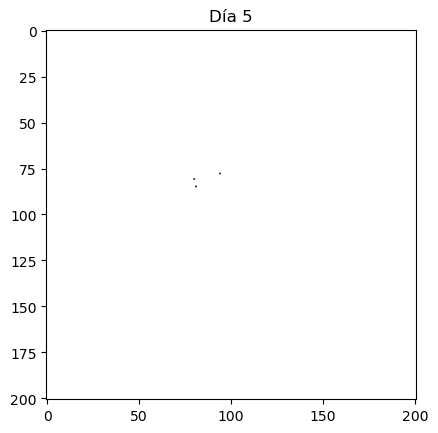


Día: 6
 Número de células: 3

Día: 7
 Número de células: 4

Día: 8
 Número de células: 4

Día: 9
 Número de células: 7

Día: 10
 Número de células: 14


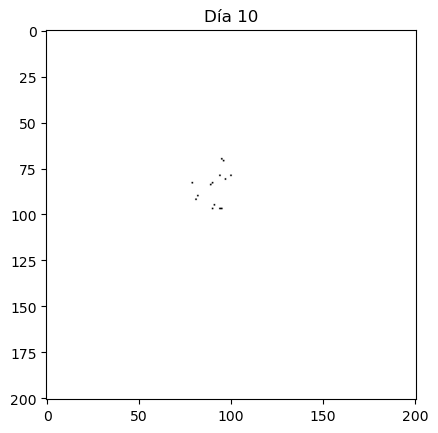


Día: 11
 Número de células: 22

Día: 12
 Número de células: 34

Día: 13
 Número de células: 43

Día: 14
 Número de células: 46

Día: 15
 Número de células: 57


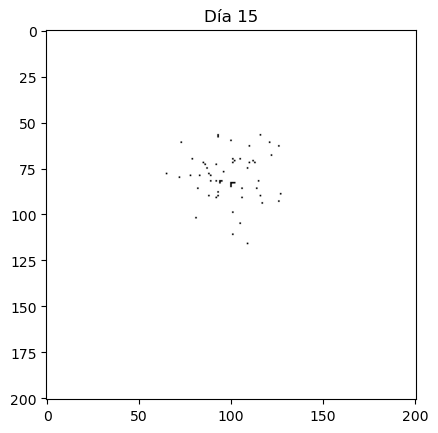


Día: 16
 Número de células: 82

Día: 17
 Número de células: 103

Día: 18
 Número de células: 115

Día: 19
 Número de células: 124

Día: 20
 Número de células: 139


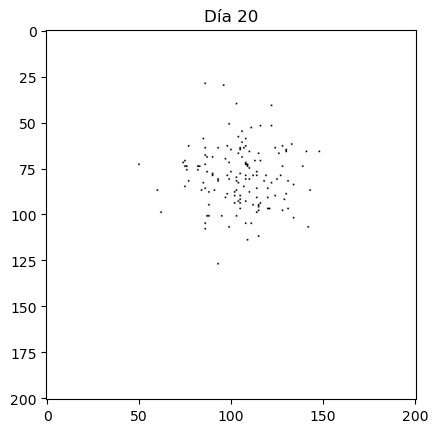


Día: 21
 Número de células: 145

Día: 22
 Número de células: 156

Día: 23
 Número de células: 182

Día: 24
 Número de células: 190

Día: 25
 Número de células: 182


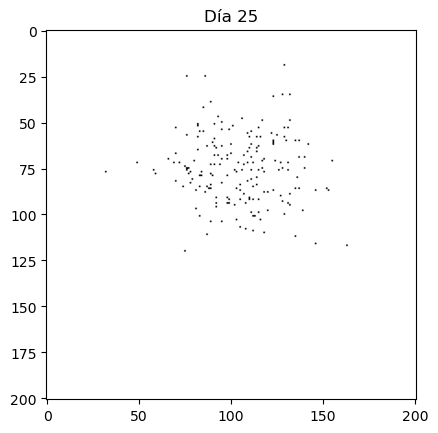


Día: 26
 Número de células: 180

Día: 27
 Número de células: 179

Día: 28
 Número de células: 185

Día: 29
 Número de células: 188

Día: 30
 Número de células: 204


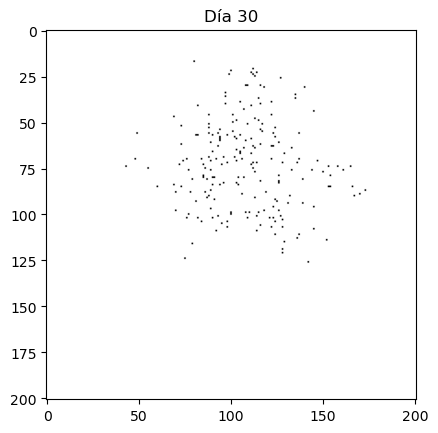


Día: 31
 Número de células: 206

Día: 32
 Número de células: 211

Día: 33
 Número de células: 225

Día: 34
 Número de células: 230

Día: 35
 Número de células: 230


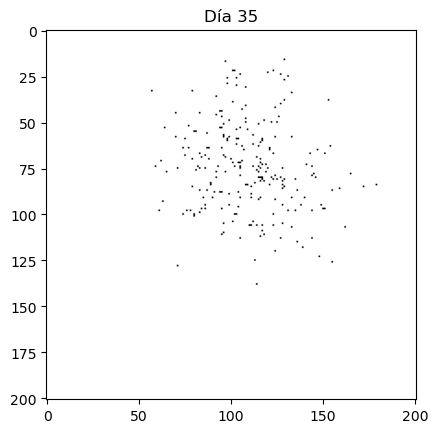


Día: 36
 Número de células: 237

Día: 37
 Número de células: 242

Día: 38
 Número de células: 257

Día: 39
 Número de células: 271

Día: 40
 Número de células: 282


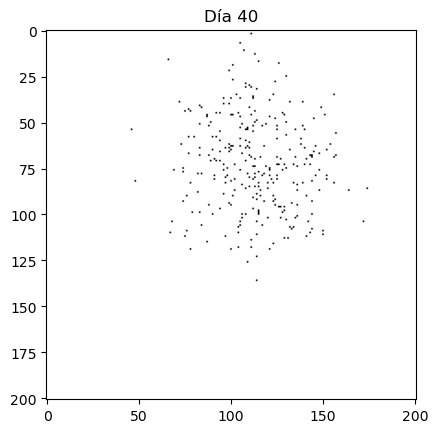


Día: 41
 Número de células: 305

Día: 42
 Número de células: 316

Día: 43
 Número de células: 338

Día: 44
 Número de células: 338

Día: 45
 Número de células: 367


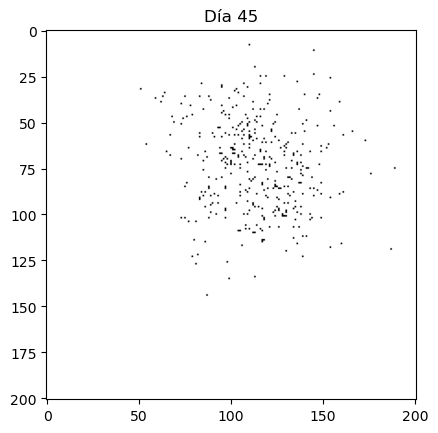


Día: 46
 Número de células: 402

Día: 47
 Número de células: 439

Día: 48
 Número de células: 479

Día: 49
 Número de células: 507

Día: 50
 Número de células: 509


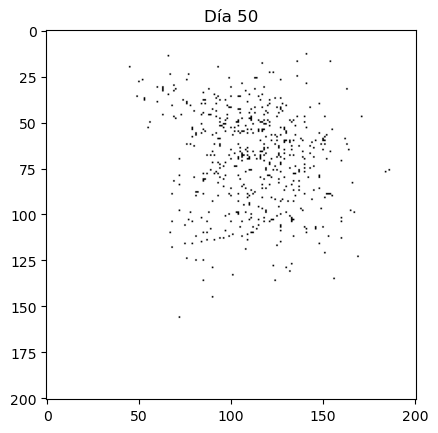


Tiempo: 2669.775302171707


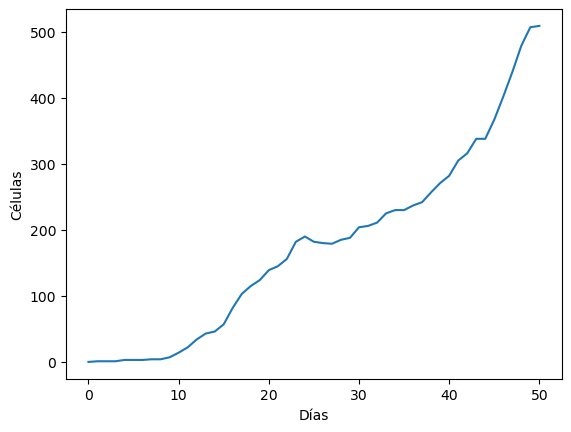

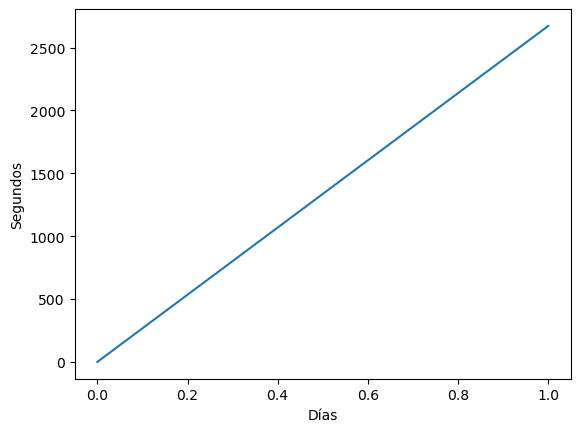

In [2]:
import random
from time import time
import matplotlib.pyplot as plt
import numpy as np
import copy

class Celula:
    def __init__(self, cct, ro, mu, alpha):
        self.cct = cct # Se usa en calculo de pd -> migración
        self.ro = ro # Número de reproducciones
        self.mu = mu # Se usa en migración
        self.alpha = alpha #NS/NC muerte?

ps = 0.1 # Para distribución
T = 1/24 # 1 hora

romax = 10 ##
alpha_max = 0.01

long = 201
#long = 751 # por buscar la del centro

#rejilla = [[]*long]*long

#print(len(rejilla))
#print(int((long-1)/2))

#rejilla = np.empty((long, long), dtype = Celula)

# Muere con probabilidad alpha
# Si rodeada no hace nada
# migra con probabilidad (1-pd)*pm   (pm=mu*T) T = 1/24 (creo)
# prolifera con probabilidad pd = (24/cct)*T
    # al proliferar produce una con probabilidad 1-ps una celula no steams y una steams
    # deduzco que si no se coge esa probabilidad la celula resultante es igual
    # si la celula es no steam se le resta un ro y la celula hija es igual

#rejilla[int((long-1)/2)][int((long-1)/2)] = Celula(24, 100000000000, 100, 0)
#rejilla[int((long-1)/2)][int((long-1)/2)] = Celula(24, 100000000000, 50, 0)

opciones = ['morir', 'migrar', 'proliferar']
opciones_hijas = ['iguales', 'distintas']


def introducir_en_casilla(casilla, celula): #La casilla 0..7 pasa a ser célula
    if casilla == 0:
        rejilla[i - 1][j - 1] = celula
    elif casilla == 1:
        rejilla[i][j - 1] = celula
    elif casilla == 2:
        rejilla[i + 1][j - 1] = celula
    elif casilla == 3:
        rejilla[i + 1][j] = celula
    elif casilla == 4:
        rejilla[i + 1][j + 1] = celula
    elif casilla == 5:
        rejilla[i][j + 1] = celula
    elif casilla == 6:
        rejilla[i - 1][j + 1] = celula
    elif casilla == 7:
        rejilla[i - 1][j] = celula

def casillas_libres(i, j): #Devuelve vector con posición 0..7 que no es célula
    libres = []

    if i-1 >= 0 and j-1 >= 0 and i-1 < long and j-1 < long and not type(rejilla[i-1][j-1]) == Celula:
        libres.append(0)

    if i >= 0 and j-1 >= 0 and i < long and j-1 < long and not type(rejilla[i][j-1]) == Celula:
        libres.append(1)

    if i+1 >= 0 and j-1 >= 0 and i+1 < long and j-1 < long and not type(rejilla[i+1][j-1]) == Celula:
        libres.append(2)

    if i+1 >= 0 and j >= 0 and i+1 < long and j < long and not type(rejilla[i+1][j]) == Celula:
        libres.append(3)

    if i+1 >= 0 and j+1 >= 0 and i+1 < long and j+1 < long and not type(rejilla[i+1][j+1]) == Celula:
        libres.append(4)

    if i >= 0 and j+1 >= 0 and i < long and j+1 < long and not type(rejilla[i][j+1]) == Celula:
        libres.append(5)

    if i-1 >= 0 and j+1 >= 0 and i-1 < long and j+1 < long and not type(rejilla[i-1][j+1]) == Celula:
        libres.append(6)

    if i-1 >= 0 and j >= 0 and i-1 < long and j < long and not type(rejilla[i-1][j]) == Celula:
        libres.append(7)

    return libres

def seleccionar_casilla(tabla): #Busca aleatoria de casilla distinta de 1, la marca como 1 y devuelve coordenadas

    casilla_encontrada = False

    while not casilla_encontrada:
        casilla_i = np.random.randint(long)
        casilla_j = np.random.randint(long)

        if not tabla[casilla_i][casilla_j] == 1:
            tabla[casilla_i][casilla_j] = 1
            return [casilla_i, casilla_j]


#for prueba in range(1, 6):
rejilla = np.empty((long, long), dtype=Celula) # Inicializamos la rejilla vacía
rejilla[int((long - 1) / 2)][int((long - 1) / 2)] = Celula(24, 100000000000, 100, 0) #Celula inicial.

celulas = [0]
tiempos = [0]

tiempo_extra_total = 0
start_time = time()
for t in range(1, 51): #51 días?
    #t = 1 # dias (24*180) pasos
    pasos = 24 # 24 horas?

    for paso in range(pasos):
        tabla_hash = np.zeros((long, long)) #Inicializamos tabla a 0
        for indice in range(long*long): #Para cada posición de la tabla

            casilla_elegida = seleccionar_casilla(tabla_hash) #Seleccionamos casilla aleatoria
            i = casilla_elegida[0]
            j = casilla_elegida[1]
            celula = rejilla[i][j] #Inicializamos celula al valor de la rejilla

            if type(celula) == Celula: # si hay una celula
                libres = casillas_libres(i, j) #Miro casillas libres alrededor

                if len(libres) > 0: # Si hay libres
                    alpha = celula.alpha
                    pd = (24/celula.cct)*T # (24/prob de migrar) * T(=1/24) día/horas
                    migrar = (1-pd)*(celula.mu*T) # Calculo probabilidad de migrar

                    pesos = [alpha, migrar, pd] #Guardo prob de [Muerte, Migración, Proliferación]
                    if celula.ro == 0:
                        pesos[2] = 0 # Si la celula no puede proliferar se pone un 0

                    opcion = np.random.choice(opciones, size = 1, p = (pesos/(np.sum(pesos))))[0] #Acción aleatoria
                 
                    if opcion == 'morir':
                        # Vaciamos casilla
                        rejilla[i][j] = None
                    elif opcion == 'migrar':
                        # Buscamos aleatorio una casilla libre para migrar
                        casilla = np.random.choice(libres)

                        copia = copy.deepcopy(celula)
                        # Vaciamos casilla
                        rejilla[i][j] = None

                        introducir_en_casilla(casilla, copia)

                    elif opcion == 'proliferar':
                        # Buscamos aleatorio una casilla libre para la célula hija
                        casilla = np.random.choice(libres)

                        if celula.alpha == 0: # Si célula madre
                            # Vemos si serán dos celulas distintas o iguales
                            pesos_hija = [ps, 1-ps]
                            celula_hija = np.random.choice(opciones_hijas, size = 1, p = (pesos_hija/(np.sum(pesos_hija))))[0]

                            if celula_hija == 'iguales':
                                introducir_en_casilla(casilla, copy.deepcopy(celula))

                            else:
                                copia = copy.deepcopy(celula)

                                copia.alpha = alpha_max
                                copia.ro = romax

                                introducir_en_casilla(casilla, copia)
                        else:
                            celula.ro -= 1
                            introducir_en_casilla(casilla, copy.deepcopy(celula))

    start_time_extra = time()
    numero_celulas = 0

    nueva_rejilla = np.zeros((long,long))

    for i in range(0, len(rejilla)):  # para cada columna
        for j in range(0, len(rejilla[i])):  # para cada celda de la columna
            # Si hay una célula
            if not rejilla[i][j] is None:
                # Añadimos un 1 para representación gráfica
                nueva_rejilla[i][j] = 1.0
                # Sumamos 1 al número de células
                numero_celulas += 1

    celulas.append(numero_celulas)

    # Imprimimos datos
    print('\nDía: ' + str(t))
    print(' Número de células: ' + str(numero_celulas))

    if t == 1 or t%5 == 0:
        plt.imshow(nueva_rejilla, vmin = 0, vmax = 1, cmap="Greys")
        plt.title('Día ' + str(t))
        plt.show()
    end_time_extra = time()
    tiempo_extra = end_time_extra - start_time_extra
    tiempo_extra_total += tiempo_extra

end_time = time()
tiempo = end_time - start_time
print('\nTiempo: ' + str(tiempo - tiempo_extra_total))

tiempos.append(tiempo)

plt.figure()
plt.plot(celulas)
plt.xlabel("Días")
plt.ylabel("Células")
plt.show()
plt.plot(tiempos)
plt.xlabel("Días")
plt.ylabel("Segundos")
plt.show()


Día: 1
 Número de células: 1


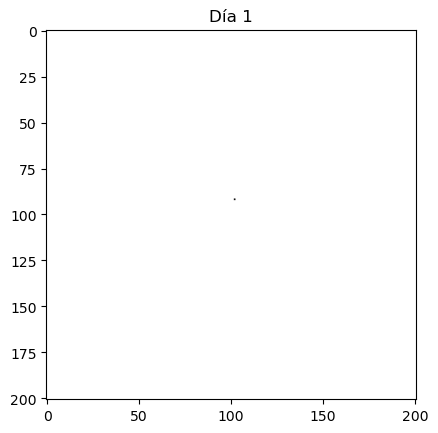


Día: 2
 Número de células: 2

Día: 3
 Número de células: 3

Día: 4
 Número de células: 3

Día: 5
 Número de células: 1


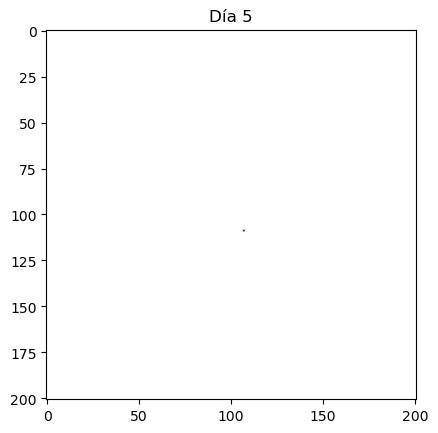


Día: 6
 Número de células: 1

Día: 7
 Número de células: 1

Día: 8
 Número de células: 1

Día: 9
 Número de células: 1

Día: 10
 Número de células: 3


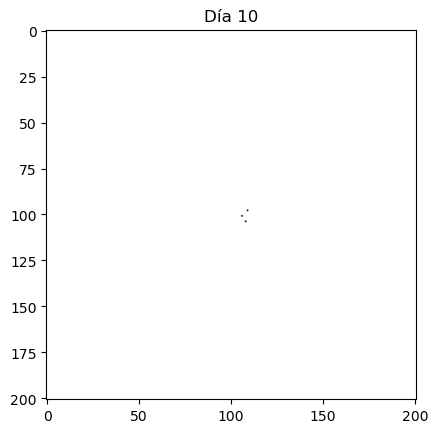


Día: 11
 Número de células: 4

Día: 12
 Número de células: 4

Día: 13
 Número de células: 5

Día: 14
 Número de células: 6

Día: 15
 Número de células: 9


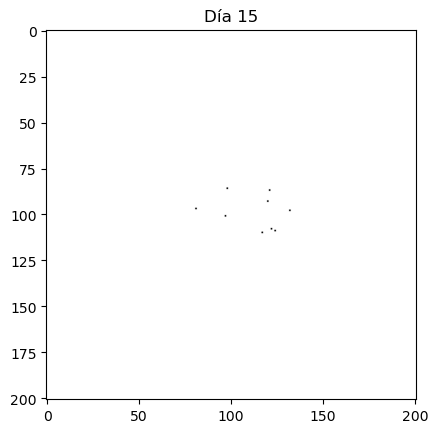


Día: 16
 Número de células: 13

Día: 17
 Número de células: 15

Día: 18
 Número de células: 18

Día: 19
 Número de células: 25

Día: 20
 Número de células: 36


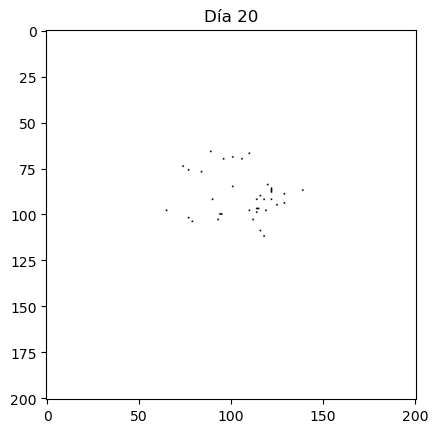


Día: 21
 Número de células: 45

Día: 22
 Número de células: 62

Día: 23
 Número de células: 82

Día: 24
 Número de células: 103

Día: 25
 Número de células: 122


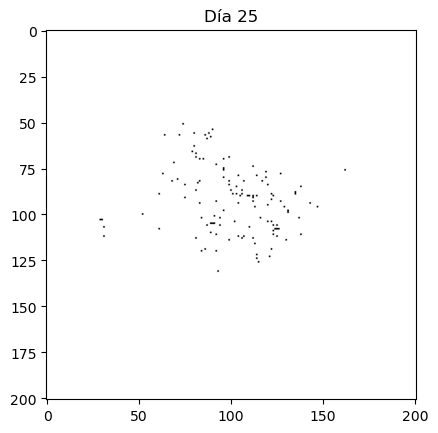


Día: 26
 Número de células: 147

Día: 27
 Número de células: 188

Día: 28
 Número de células: 262

Día: 29
 Número de células: 329

Día: 30
 Número de células: 369


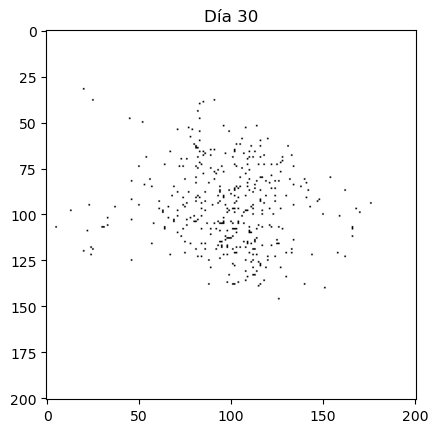


Día: 31
 Número de células: 429

Día: 32
 Número de células: 497

Día: 33
 Número de células: 574

Día: 34
 Número de células: 640

Día: 35
 Número de células: 681


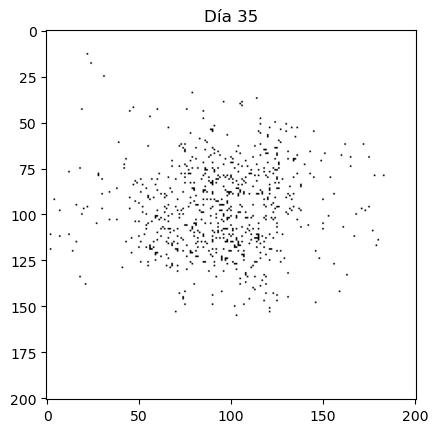


Día: 36
 Número de células: 748

Día: 37
 Número de células: 834

Día: 38
 Número de células: 910

Día: 39
 Número de células: 998

Día: 40
 Número de células: 1064


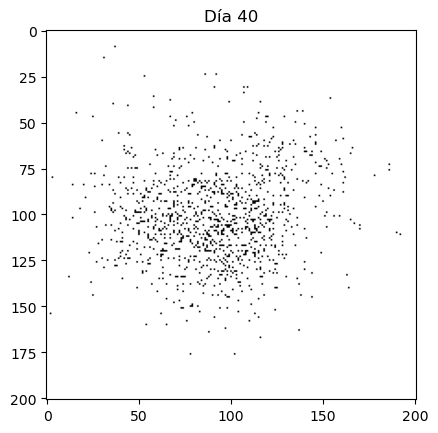


Día: 41
 Número de células: 1107

Día: 42
 Número de células: 1174

Día: 43
 Número de células: 1223

Día: 44
 Número de células: 1275

Día: 45
 Número de células: 1347


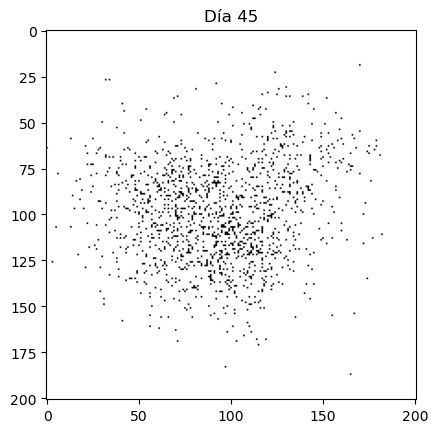


Día: 46
 Número de células: 1406

Día: 47
 Número de células: 1477

Día: 48
 Número de células: 1573

Día: 49
 Número de células: 1653

Día: 50
 Número de células: 1727


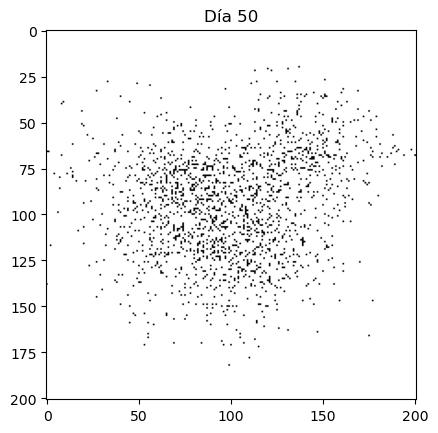


Tiempo: 142.56882619857788


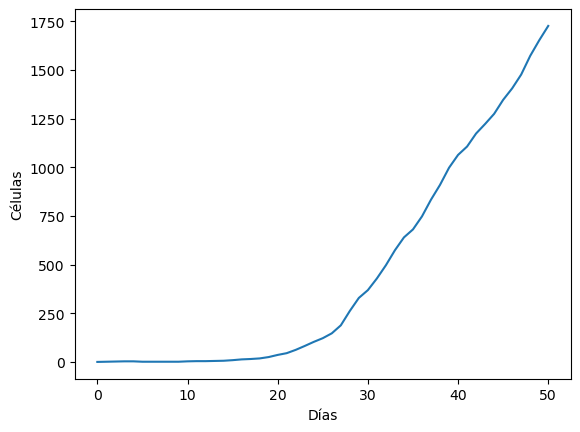

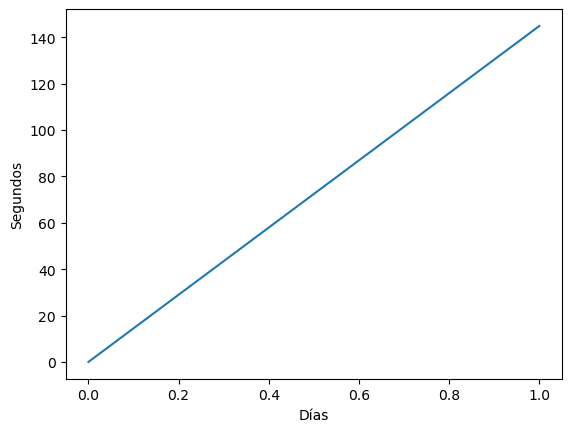

In [4]:
import random
from time import time
import matplotlib.pyplot as plt
import numpy as np
import copy

class Celula:
    def __init__(self, cct, ro, mu, alpha):
        self.cct = cct # Se usa en calculo de pd -> migración
        self.ro = ro # Número de reproducciones
        self.mu = mu # Se usa en migración
        self.alpha = alpha #NS/NC muerte?

ps = 0.1 # Para distribución
T = 1/24 # 1 hora

romax = 10 ##
alpha_max = 0.01

long = 201
# por buscar la del centro

#rejilla = [[]*long]*long

# Muere con probabilidad alpha
# Si rodeada no hace nada
# migra con probabilidad (1-pd)*pm   (pm=mu*T) T = 1/24 (creo)
# prolifera con probabilidad pd = (24/cct)*T
    # al proliferar produce una con probabilidad 1-ps una celula no steams y una steams
    # deduzco que si no se coge esa probabilidad la celula resultante es igual
    # si la celula es no steam se le resta un ro y la celula hija es igual

#rejilla[int((long-1)/2)][int((long-1)/2)] = Celula(24, 100000000000, 100, 0)
#rejilla[int((long-1)/2)][int((long-1)/2)] = Celula(24, 100000000000, 50, 0)

opciones = ['morir', 'migrar', 'proliferar']
opciones_hijas = ['iguales', 'distintas']


def introducir_en_casilla(casilla, celula): #La casilla 0..7 pasa a ser célula
    if casilla == 0:
        rejilla[i - 1][j - 1] = celula
    elif casilla == 1:
        rejilla[i][j - 1] = celula
    elif casilla == 2:
        rejilla[i + 1][j - 1] = celula
    elif casilla == 3:
        rejilla[i + 1][j] = celula
    elif casilla == 4:
        rejilla[i + 1][j + 1] = celula
    elif casilla == 5:
        rejilla[i][j + 1] = celula
    elif casilla == 6:
        rejilla[i - 1][j + 1] = celula
    elif casilla == 7:
        rejilla[i - 1][j] = celula

def casillas_libres(i, j): #Devuelve vector con posición 0..7 que no es célula
    libres = []

    if i-1 >= 0 and j-1 >= 0 and i-1 < long and j-1 < long and not type(rejilla[i-1][j-1]) == Celula:
        libres.append(0)

    if i >= 0 and j-1 >= 0 and i < long and j-1 < long and not type(rejilla[i][j-1]) == Celula:
        libres.append(1)

    if i+1 >= 0 and j-1 >= 0 and i+1 < long and j-1 < long and not type(rejilla[i+1][j-1]) == Celula:
        libres.append(2)

    if i+1 >= 0 and j >= 0 and i+1 < long and j < long and not type(rejilla[i+1][j]) == Celula:
        libres.append(3)

    if i+1 >= 0 and j+1 >= 0 and i+1 < long and j+1 < long and not type(rejilla[i+1][j+1]) == Celula:
        libres.append(4)

    if i >= 0 and j+1 >= 0 and i < long and j+1 < long and not type(rejilla[i][j+1]) == Celula:
        libres.append(5)

    if i-1 >= 0 and j+1 >= 0 and i-1 < long and j+1 < long and not type(rejilla[i-1][j+1]) == Celula:
        libres.append(6)

    if i-1 >= 0 and j >= 0 and i-1 < long and j < long and not type(rejilla[i-1][j]) == Celula:
        libres.append(7)

    return libres

def seleccionar_casilla(tabla): #Busca aleatoria de casilla distinta de 1, la marca como 1 y devuelve coordenadas

    casilla_encontrada = False

    while not casilla_encontrada:
        casilla_i = np.random.randint(long)
        casilla_j = np.random.randint(long)

        if not tabla[casilla_i][casilla_j] == 1:
            tabla[casilla_i][casilla_j] = 1
            return [casilla_i, casilla_j]
        

matriz = [(i,a) for i in np.arange(long) for a in np.arange(long)]
def mapa_aleatorio():
    random.shuffle(matriz) 
    return matriz


#for prueba in range(1, 6):
rejilla = np.empty((long, long), dtype=Celula) # Inicializamos la rejilla vacía
rejilla[int((long - 1) / 2)][int((long - 1) / 2)] = Celula(24, 100000000000, 100, 0) #Celula inicial.

celulas = [0]
tiempos = [0]

tiempo_extra_total = 0
start_time = time()
for t in range(1, 51): #51 días?
    #t = 1 # dias (24*180) pasos
    pasos = 24 # 24 horas?

    for paso in range(pasos):
        vector_indices = mapa_aleatorio()
        
        for indice in range(long*long): #Para cada posición

            casilla_elegida = vector_indices[indice] #Seleccionamos casilla aleatoria
            i = casilla_elegida[0]
            j = casilla_elegida[1]
            celula = rejilla[i][j] #Inicializamos celula al valor de la rejilla

            if type(celula) == Celula: # si hay una celula
                libres = casillas_libres(i, j) #Miro casillas libres alrededor

                if len(libres) > 0: # Si hay libres
                    alpha = celula.alpha
                    pd = (24/celula.cct)*T # (24/prob de migrar) * T(=1/24) día/horas
                    migrar = (1-pd)*(celula.mu*T) # Calculo probabilidad de migrar

                    pesos = [alpha, migrar, pd] #Guardo prob de [Muerte, Migración, Proliferación]
                    if celula.ro == 0:
                        pesos[2] = 0 # Si la celula no puede proliferar se pone un 0

                    opcion = np.random.choice(opciones, size = 1, p = (pesos/(np.sum(pesos))))[0] #Acción aleatoria
                 
                    if opcion == 'morir':
                        # Vaciamos casilla
                        rejilla[i][j] = None
                    elif opcion == 'migrar':
                        # Buscamos aleatorio una casilla libre para migrar
                        casilla = np.random.choice(libres)

                        copia = copy.deepcopy(celula)
                        # Vaciamos casilla
                        rejilla[i][j] = None

                        introducir_en_casilla(casilla, copia)

                    elif opcion == 'proliferar':
                        # Buscamos aleatorio una casilla libre para la célula hija
                        casilla = np.random.choice(libres)

                        if celula.alpha == 0: # Si célula madre
                            # Vemos si serán dos celulas distintas o iguales
                            pesos_hija = [ps, 1-ps]
                            celula_hija = np.random.choice(opciones_hijas, size = 1, p = (pesos_hija/(np.sum(pesos_hija))))[0]

                            if celula_hija == 'iguales':
                                introducir_en_casilla(casilla, copy.deepcopy(celula))

                            else:
                                copia = copy.deepcopy(celula)

                                copia.alpha = alpha_max
                                copia.ro = romax

                                introducir_en_casilla(casilla, copia)
                        else:
                            celula.ro -= 1
                            introducir_en_casilla(casilla, copy.deepcopy(celula))

    start_time_extra = time()
    numero_celulas = 0

    nueva_rejilla = np.zeros((long,long))

    for i in range(0, len(rejilla)):  # para cada columna
        for j in range(0, len(rejilla[i])):  # para cada celda de la columna
            # Si hay una célula
            if not rejilla[i][j] is None:
                # Añadimos un 1 para representación gráfica
                nueva_rejilla[i][j] = 1.0
                # Sumamos 1 al número de células
                numero_celulas += 1

    celulas.append(numero_celulas)

    # Imprimimos datos
    print('\nDía: ' + str(t))
    print(' Número de células: ' + str(numero_celulas))

    if t == 1 or t%5 == 0:
        plt.imshow(nueva_rejilla, vmin = 0, vmax = 1, cmap="Greys")
        plt.title('Día ' + str(t))
        plt.show()
    end_time_extra = time()
    tiempo_extra = end_time_extra - start_time_extra
    tiempo_extra_total += tiempo_extra

end_time = time()
tiempo = end_time - start_time
print('\nTiempo: ' + str(tiempo - tiempo_extra_total))

tiempos.append(tiempo)

plt.figure()
plt.plot(celulas)
plt.xlabel("Días")
plt.ylabel("Células")
plt.show()
plt.plot(tiempos)
plt.xlabel("Días")
plt.ylabel("Segundos")
plt.show()